In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
#from pandas_datareader import data as pdr

In [3]:
from data import get_data

In [4]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
df = get_data(tiker='CVNA', start='2022-03-03', end='2022-08-06', interval='1h')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
0,2022-03-03 09:30:00-05:00,142.929993,144.130005,127.430000,128.919998,128.919998,1118853,NaN,NaN
1,2022-03-03 10:30:00-05:00,128.639999,130.339996,126.019997,127.739998,127.739998,749943,-0.009153,-0.009195
2,2022-03-03 11:30:00-05:00,127.580002,128.137604,125.559998,125.650002,125.650002,468611,-0.016361,-0.016497
3,2022-03-03 12:30:00-05:00,125.680000,130.467300,124.699997,128.970001,128.970001,709592,0.026423,0.026080
4,2022-03-03 13:30:00-05:00,129.035004,129.325394,126.379997,127.449997,127.449997,259913,-0.011786,-0.011856
...,...,...,...,...,...,...,...,...,...
752,2022-08-05 12:30:00-04:00,46.459499,46.459999,43.820000,44.430000,44.430000,3218476,-0.042766,-0.043708
753,2022-08-05 13:30:00-04:00,44.445000,46.209900,43.330002,45.629902,45.629902,3934401,0.027007,0.026648
754,2022-08-05 14:30:00-04:00,45.580101,48.150002,45.560001,46.709900,46.709900,6026505,0.023669,0.023393
755,2022-08-05 15:30:00-04:00,46.660000,47.289902,45.734299,46.980000,46.980000,3185870,0.005782,0.005766


In [9]:
# df Close -> arroon_up
i=0
def aroon_upp(aroon_i, row):
        global i
        i=i+1
        if(i>aroon_i):
            t= i - df['Close'][i-aroon_i:i].idxmax()
            return (t/aroon_i)*100
        else:
            return 0


def aroon_down(aroon_i, row):
        global i
        i=i+1
        if(i>aroon_i):
            t= i - df['Close'][i-aroon_i:i].idxmin()
            return (t/aroon_i)*100
        else:
            return 0


i=0
df['aroon_up'] = df.apply (lambda row: aroon_upp(9, row), axis=1)

i=0
df['aroon_down'] = df.apply (lambda row: aroon_down(9, row), axis=1)

print(df['aroon_down'])

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
752     66.666667
753     77.777778
754     88.888889
755    100.000000
756    100.000000
Name: aroon_down, Length: 757, dtype: float64


In [11]:
df[:10]

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret,aroon_up,aroon_down
0,2022-03-03 09:30:00-05:00,142.929993,144.130005,127.430000,128.919998,128.919998,1118853,NaN,NaN,0.000000,0.000000
1,2022-03-03 10:30:00-05:00,128.639999,130.339996,126.019997,127.739998,127.739998,749943,-0.009153,-0.009195,0.000000,0.000000
2,2022-03-03 11:30:00-05:00,127.580002,128.137604,125.559998,125.650002,125.650002,468611,-0.016361,-0.016497,0.000000,0.000000
3,2022-03-03 12:30:00-05:00,125.680000,130.467300,124.699997,128.970001,128.970001,709592,0.026423,0.026080,0.000000,0.000000
4,2022-03-03 13:30:00-05:00,129.035004,129.325394,126.379997,127.449997,127.449997,259913,-0.011786,-0.011856,0.000000,0.000000
5,2022-03-03 14:30:00-05:00,127.539902,127.539902,123.284203,124.195000,124.195000,610752,-0.025539,-0.025871,0.000000,0.000000
6,2022-03-03 15:30:00-05:00,124.190002,124.199997,122.285004,123.500000,123.500000,691544,-0.005596,-0.005612,0.000000,0.000000
7,2022-03-04 09:30:00-05:00,123.269997,123.500000,112.100998,114.392899,114.392899,1992156,-0.073742,-0.076602,0.000000,0.000000
8,2022-03-04 10:30:00-05:00,114.190002,115.213997,108.620003,109.800003,109.800003,1166385,-0.040150,-0.040978,0.000000,0.000000
9,2022-03-04 11:30:00-05:00,109.980003,110.050003,103.610001,107.595001,107.595001,1636825,-0.020082,-0.020286,77.777778,11.111111


In [15]:
signal = np.zeros(df.shape[0])

In [19]:
df['aroon_up'][1]

0.0

In [20]:

for i in range(df.shape[0]):
    if i < 9:
        pass
    else:
        if (df['aroon_up'][i] > 0.7) & (df['aroon_down'][i] < 0.3):
            signal[i] =  1
        elif (df['aroon_down'][i] > 0.7) & (df['aroon_up'][i] < 0.3):
            signal[i] = -1
        else:
            pass
            

In [13]:
7/9

0.7777777777777778

In [ ]:
for i, row in df.iterrows():
    row['aroon_down']
    break
    
    

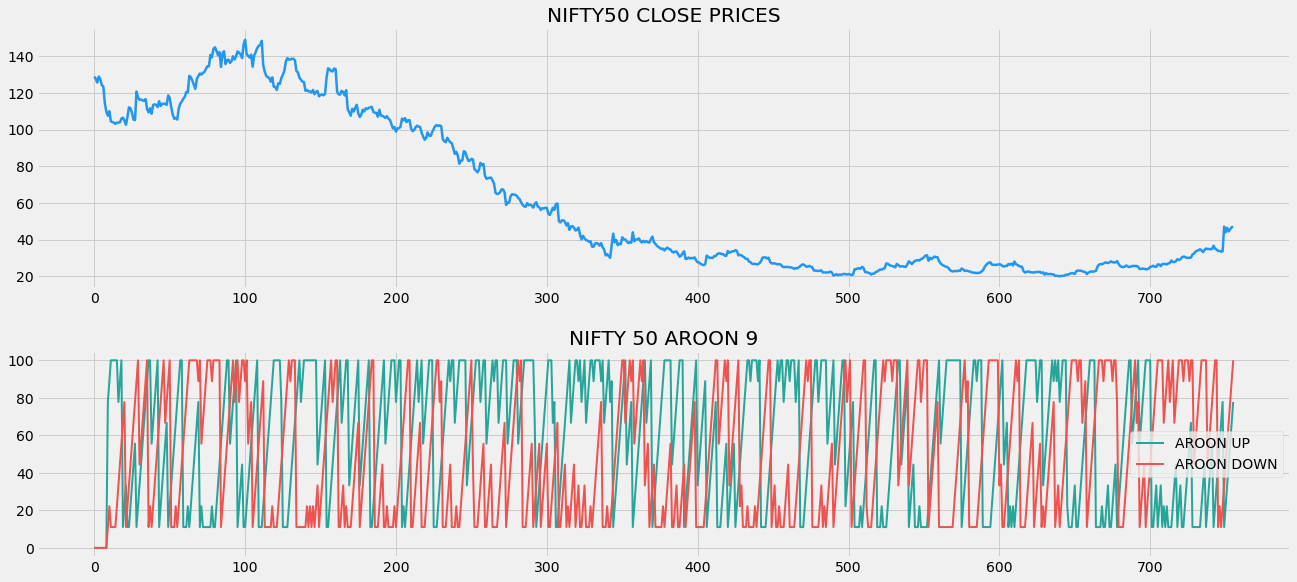

In [30]:
def plot_aroon(df, aroon_settings):
    ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5, color = '#2196f3')
    ax1.set_title('NIFTY50 CLOSE PRICES')
    ax2.plot(df['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
    ax2.plot(df['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
    ax2.legend()
    ax2.set_title(f'AROON up{aroon_settings.aroon_up_i} down{aroon_settings.aroon_down_i}')
    plt.show()

In [31]:
def implement_aroon_strategy(prices, up, down):
    buy_price = []
    sell_price = []
    aroon_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if up[i] >= 70 and down[i] <= 30: # buy
            if signal != 1: # 
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        elif up[i] <= 30 and down[i] >= 70: # sell
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            aroon_signal.append(0)
            
    return buy_price, sell_price, aroon_signal

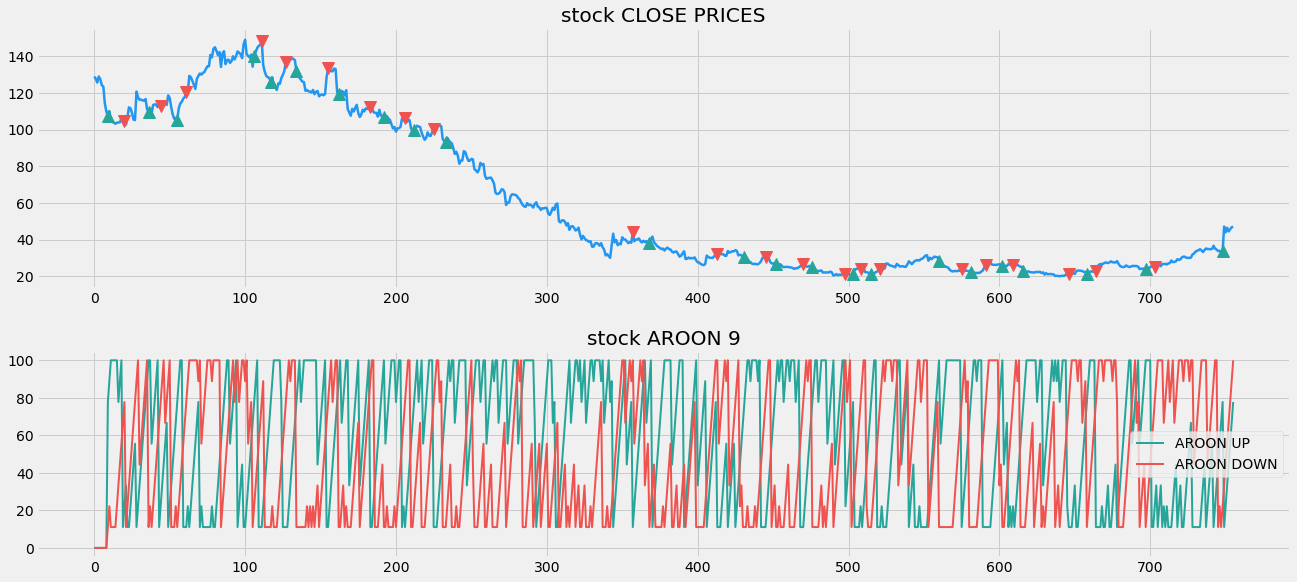

In [33]:

def plot():
    buy_price, sell_price, aroon_signal = implement_aroon_strategy(df['Close'], df['aroon_up'], df['aroon_down'])

    ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5, color = '#2196f3')
    ax1.plot(df.index, buy_price, marker = '^', color = '#26a69a', markersize = 12)
    ax1.plot(df.index, sell_price, marker = 'v', color = '#ef5350', markersize = 12)
    ax1.set_title('stock CLOSE PRICES')
    ax2.plot(df['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
    ax2.plot(df['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
    ax2.legend()
    ax2.set_title('stock AROON 9')
    plt.show()